In [ ]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import duckdb
import plotly.express as px
import seaborn as sns

In [ ]:
conn = duckdb.connect()

In [ ]:
# Check if the table exists before creating it
conn.execute("DROP TABLE IF EXISTS mytable")

query = """
CREATE TABLE mytable AS
SELECT
    column0 AS MCV,
    column1 AS FA,
    column2 AS TGP,
    column3 AS TGO,
    column4 AS GGT,
    column5 AS Drinks,
FROM read_csv_auto('bupa.data');
"""

In [ ]:
conn.execute(query)

Analysis of Alcohol Consumption and Liver Health

This work explores the relationship between alcohol consumption and liver function, focusing on how drinking habits influence key biomarkers like Gamma-Glutamyl Transpeptidase (GGT). By analyzing these patterns, the study aims to provide insights into the potential impact of alcohol on liver function.

In [ ]:
## selects everything from the table
query = """
select *
from mytable
"""

## executes the query and create a datafram from it.
df = conn.sql(query).df()
df

,MCV,FA,TGP,TGO,GGT,Drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


In [ ]:
import pandas as pd

# Calcula as medidas de sumário para a coluna 'drinks'
drinks_summary = df['drinks'].describe().to_frame().transpose()

# Renomeia a coluna 'drinks' para 'Drinks'
drinks_summary = drinks_summary.rename(columns={'drinks': 'Drinks'})  # Correção: renomear antes da formatação

# Aplica estilos CSS, formatação numérica e legenda à tabela
styled_table = drinks_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('caption-side', 'bottom')]},  # Legenda no final
]).format({
    'count': "{:.0f}",
    'mean': "{:.2f}",
    'std': "{:.2f}",
    'min': "{:.0f}",
    '25%': "{:.2f}",
    '50%': "{:.2f}",
    '75%': "{:.2f}",
    'max': "{:.0f}",
}).set_caption(
    "Table 1. Summary statistics for daily alcohol consumption (Drinks) expressed as the number "
    "of half-pint equivalents."
)

# Exibe a tabela estilizada
display(styled_table)

,count,mean,std,min,25%,50%,75%,max
drinks,345,3.46,3.34,0,0.50,3.00,6.00,20


Table 1 provides descriptive statistics for daily alcohol consumption, measured in half-pint equivalents. The average daily consumption is 3.46 units, with a standard deviation of 3.34. Values range from 0 to 20 units, with 50% of the sample consuming up to 3 units.

In [ ]:
import pandas as pd

# Calcula as medidas de sumário para a coluna 'GGT'
drinks_summary = df['GGT'].describe().to_frame().transpose()

# Aplica estilos CSS, formatação numérica e legenda à tabela
styled_table = drinks_summary.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('caption-side', 'bottom')]}  # Legenda no final
]).format({
    'count': "{:.0f}",
    'mean': "{:.2f}",
    'std': "{:.2f}",
    'min': "{:.0f}",
    '25%': "{:.2f}",
    '50%': "{:.2f}",
    '75%': "{:.2f}",
    'max': "{:.0f}",
}).set_caption(
    "Table 2. Summary statistics for Gamma-glutamyl transpeptidase (GGT) levels."
)

# Exibe a tabela estilizada
display(styled_table)

,count,mean,std,min,25%,50%,75%,max
GGT,345,38.28,39.25,5,15.00,25.00,46.00,297


Table 2 summarizes the GGT levels in the sample. The average GGT level is 38.28, with a standard deviation of 39.25. The values range from a minimum of 5 to a maximum of 297, and 50% of the sample have GGT levels of 25 or lower.

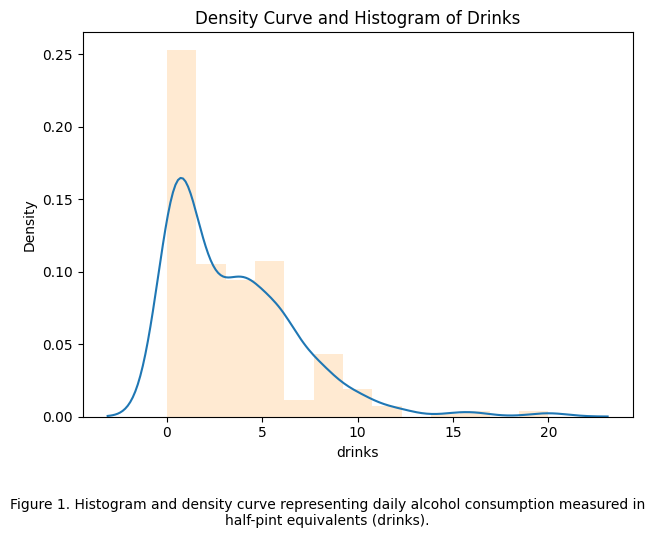

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a figura e o eixo
fig, ax = plt.subplots()

# Plota a curva de densidade para a coluna 'drinks'
sns.kdeplot(data=df, x='drinks', ax=ax)

# Plota o histograma para a coluna 'drinks' com cor laranja clarinho e sem contorno
sns.histplot(data=df, x='drinks', ax=ax, stat="density", kde=False, color='bisque', edgecolor='none')

# Define o título do gráfico
plt.title('Density Curve and Histogram of Drinks')

# Adiciona a legenda como Figure 1
plt.figtext(0.5, -0.1, 'Figure 1. Histogram and density curve representing daily alcohol consumption '
                        'measured in half-pint equivalents (drinks).',
            wrap=True, horizontalalignment='center', fontsize=10)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


Figure 1 presents a histogram and density curve illustrating the distribution of daily alcohol consumption. Most participants consume relatively low amounts, with a peak around 0 to 3 units.

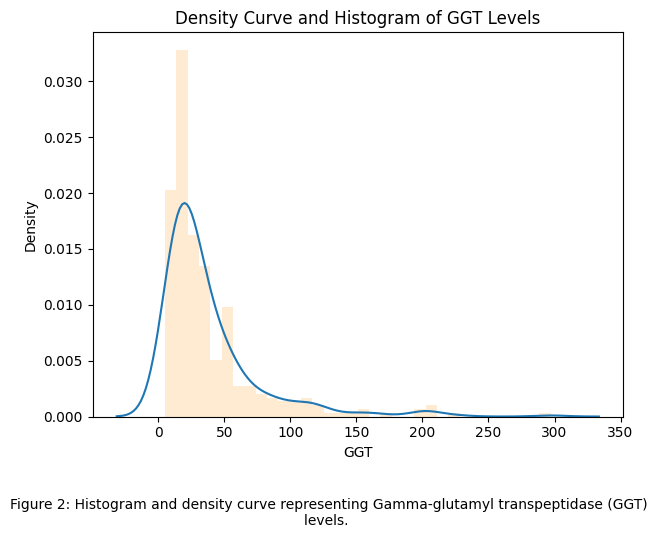

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a figura e o eixo
fig, ax = plt.subplots()

# Plota a curva de densidade para a coluna 'GGT'
sns.kdeplot(data=df, x='GGT', ax=ax)

# Plota o histograma para a coluna 'GGT' com cor laranja clarinho e sem contorno
sns.histplot(data=df, x='GGT', ax=ax, stat="density", kde=False, color='bisque', edgecolor='none')

# Define o título do gráfico
plt.title('Density Curve and Histogram of GGT Levels')

# Adiciona a legenda como Figure 2
plt.figtext(0.5, -0.1, 'Figure 2: Histogram and density curve representing Gamma-glutamyl transpeptidase (GGT) levels. ',
            wrap=True, horizontalalignment='center', fontsize=10)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

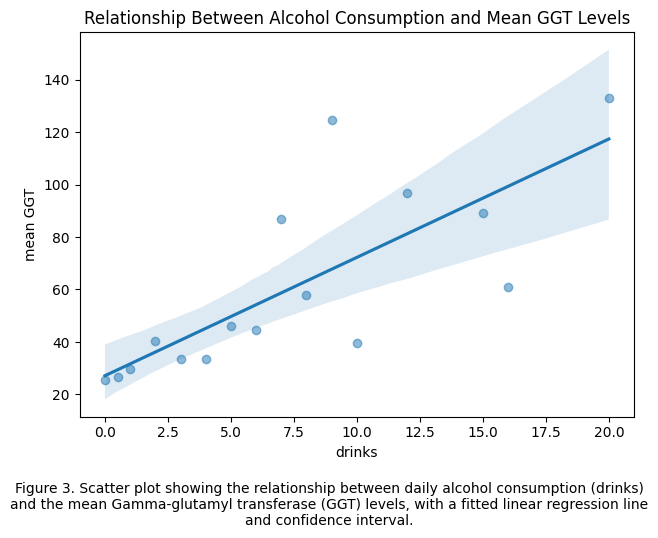

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Agrupa os dados por 'drinks' e calcula a média de 'GGT'
df_mean = df.groupby('drinks')['GGT'].mean().reset_index()

# Cria o scatter plot com linha de regressão linear
sns.regplot(x='drinks', y='GGT', data=df_mean, scatter_kws={'alpha':0.5})

# Define o título do gráfico
plt.title('Relationship Between Alcohol Consumption and Mean GGT Levels')

# Renomeia o eixo y
plt.ylabel('mean GGT')

# Adiciona a legenda como Figure 3
plt.figtext(0.5, -0.1, 'Figure 3. Scatter plot showing the relationship between daily alcohol consumption (drinks) '
                        'and the mean Gamma-glutamyl transferase (GGT) levels, with a fitted linear regression line '
                        'and confidence interval.',
            wrap=True, horizontalalignment='center', fontsize=10)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

The scatter plot with a fitted linear regression line in Figure 3 shows the relationship between daily alcohol consumption and average GGT levels. The plot indicates a positive correlation, suggesting that higher alcohol consumption is associated with increased mean GGT levels.

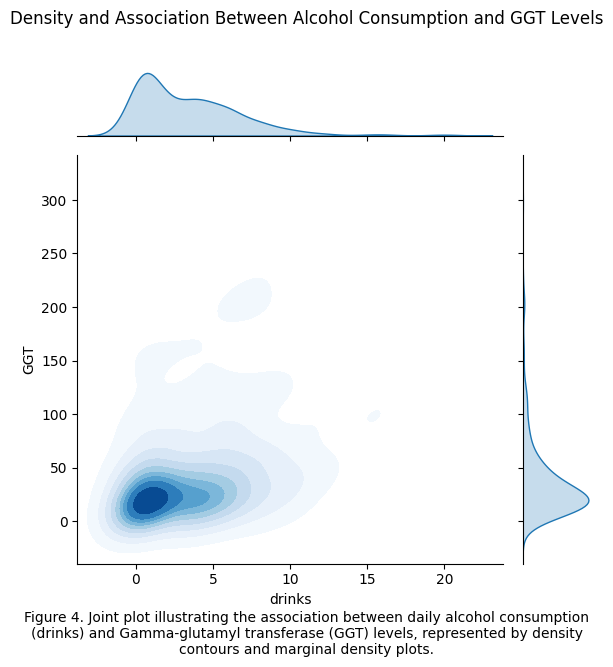

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria o scatter plot com cores representando a densidade
joint_plot = sns.jointplot(x='drinks', y='GGT', data=df, kind='kde', fill=True, cmap='Blues')

# Define o título do gráfico
joint_plot.fig.suptitle('Density and Association Between Alcohol Consumption and GGT Levels', y=1.02)  # Ajuste a posição do título

# Adiciona a legenda como Figure 4
joint_plot.fig.text(0.5, -0.05, 'Figure 4. Joint plot illustrating the association between daily alcohol consumption (drinks) '
                                'and Gamma-glutamyl transferase (GGT) levels, represented by density contours and '
                                'marginal density plots.',
                    wrap=True, horizontalalignment='center', fontsize=10)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

The joint plot in Figure 4 illustrates the association between daily alcohol consumption and GGT levels using density contours and marginal density plots. The results confirm a positive relationship, with areas of higher density observed at low consumption and low GGT levels, as well as increasing density at higher values for both variables.

The data reveals a positive correlation between alcohol consumption and GGT levels, a key biomarker for liver function. Elevated GGT in individuals with higher alcohol intake suggests potential liver stress or damage, aligning with clinical evidence linking excessive drinking to hepatotoxicity. This highlights the importance of monitoring GGT levels in patients with high alcohol consumption to assess liver health and prevent long-term complications.